In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data = pd.read_csv("C:/Users/Administrator/Desktop/abalone.data",
                  names=["sex","length","diameter","height",
                         "whole weight","shucked weight",
                         "viscera weight","shell weight",
                         "rings"])
                         
#Get features
y = data['rings']
X = data[["sex","length","height",
          "shucked weight","viscera weight","shell weight"]]

In [3]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
data['rings1'] = data['rings']  # Example splitting
data['rings2'] = data['rings']*0.85  # Example splitting
data['rings3'] = data['rings']*1.15  # Example splitting

y = data[['rings1', 'rings2', 'rings3']]  # Creating a DataFrame with three output columns

In [5]:
y.shape

(4177, 3)

In [6]:
X.shape

(4177, 8)

In [7]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)
y_pred = model.predict(X)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 均方误差（Mean Squared Error）
mse = mean_squared_error(y, y_pred)

# 均方根误差（Root Mean Squared Error）
rmse = mean_squared_error(y, y_pred, squared=False)

# 平均绝对误差（Mean Absolute Error）
mae = mean_absolute_error(y, y_pred)

# 计算R平方
r2 = r2_score(y, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.9063534743980792
Mean Squared Error: 0.9839098390317318
Root Mean Squared Error: 0.9850680490255964
Mean Absolute Error: 0.7056800966412738


In [9]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [10]:
shap_values.shape

(4177, 8, 3)

In [11]:
shap_values_output1 = shap_values[:,:,0]
shap_values_output2 = shap_values[:,:,1]
shap_values_output3 = shap_values[:,:,2]

In [12]:
sum_shap_values = shap_values_output1 + shap_values_output2 + shap_values_output3

# 求 SHAP 值的平均值
shap_values = sum_shap_values / 3  # 3 是输出变量的数量

In [13]:
shap_values.shape

(4177, 8)

#### Plot 1: Waterfall  (针对特定样本)

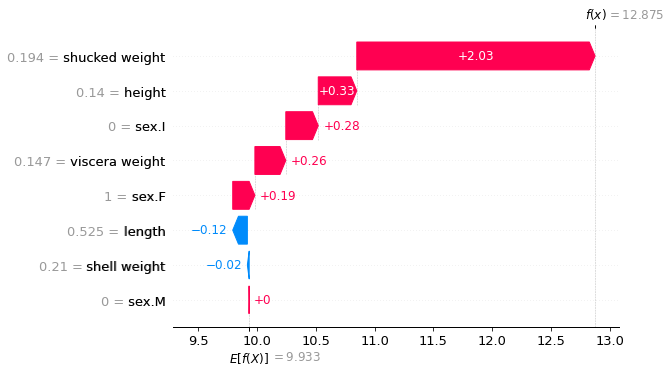

In [14]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[10])

#### Plot 2: Force Plot (单个样本)

In [15]:
# Forceplot for first observation
shap.plots.force(shap_values[0])

#### Plot 3: Stacked force plot

In [16]:
shap.plots.force(shap_values[0:200])

#### Plot 4: Mean SHAP

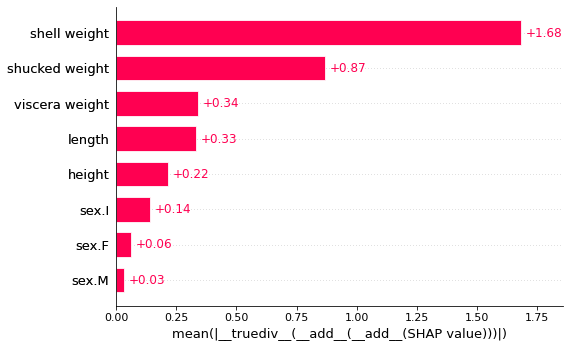

In [17]:
#Mean SHAP
shap.plots.bar(shap_values)

#### Plot 5: Beeswarm

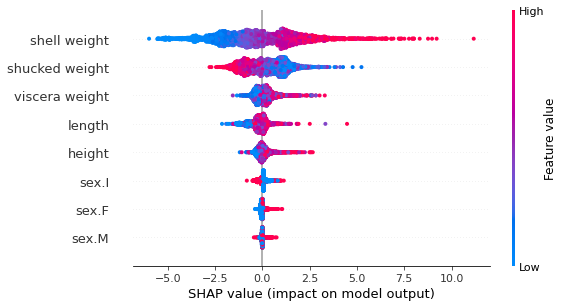

In [18]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

#### Plot 6: Dependence plots  ( They are particularly useful if the feature has a non-linear relationship with the target variable.)

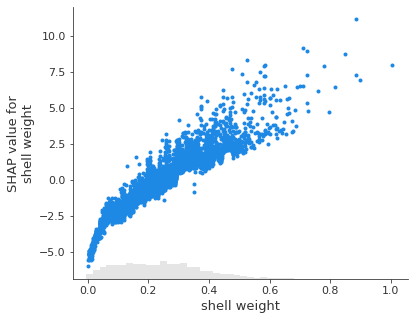

In [19]:
#Plot 1: shell weight
shap.plots.scatter(shap_values[:,"shell weight"])

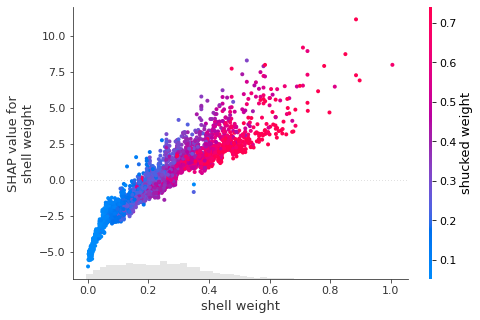

In [20]:
shap.plots.scatter(shap_values[:,"shell weight"],
                   color=shap_values[:,"shucked weight"])

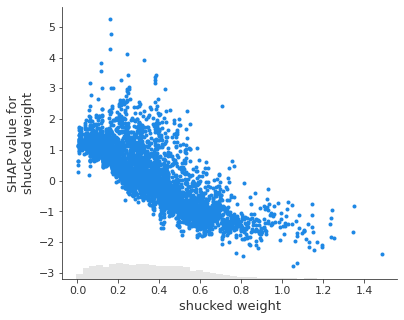

In [21]:
#Plot 2: shucked weight
shap.plots.scatter(shap_values[:,"shucked weight"])

##### potential options: 

- 'viridis'
- 'plasma'
- 'inferno'
- 'magma'
- 'cividis'
- 'coolwarm'
- 'RdBu_r'
- 'YlGnBu'
- 'PuBu'
- 'OrRd'

### TCN 3 days

In [22]:
import numpy as np

# 读取导出的CSV文件
shap_values_output = np.loadtxt("C:/Users/Administrator/Desktop/TCN_3days_shap_values_output.csv", delimiter=',')

print(shap_values_output.shape)

(1000, 22)


In [23]:
import torch

# 读取导出的PyTorch tensor文件
selected_samples = torch.load("C:/Users/Administrator/Desktop/TCN_3days_selected_samples.pt", map_location=torch.device('cpu'))

#print(loaded_data)
print(selected_samples.shape)

torch.Size([1000, 22])


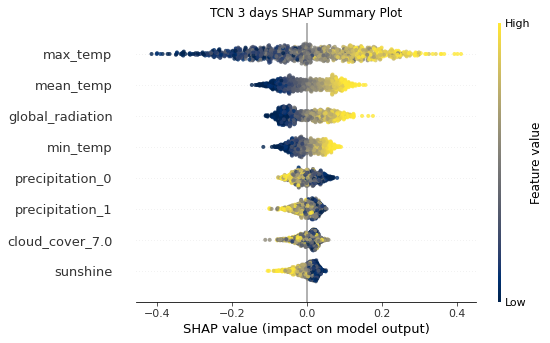

In [25]:
column_names = [
    "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]

shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8, 
                  alpha=0.8, show=False, title='None', cmap='cividis')

plt.title("TCN 3 days SHAP Summary Plot")
plt.show()


In [26]:
import numpy as np

# 读取导出的CSV文件
shap_values_output = np.loadtxt("C:/Users/Administrator/Desktop/TCN_7days_shap_values_output.csv", delimiter=',')

print(shap_values_output.shape)

(1000, 22)


In [27]:
import torch

# 读取导出的PyTorch tensor文件
selected_samples = torch.load("C:/Users/Administrator/Desktop/TCN_7days_selected_samples.pt", map_location=torch.device('cpu'))

#print(loaded_data)
print(selected_samples.shape)

torch.Size([1000, 22])


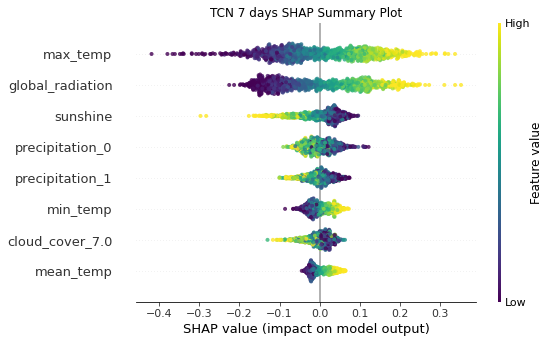

In [29]:
column_names = [
    "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]

shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8, 
                  alpha=0.8, show=False, title='None', cmap='viridis')

plt.title("TCN 7 days SHAP Summary Plot")
plt.show()


In [22]:
import numpy as np

# 读取导出的CSV文件
shap_values_output = np.loadtxt("C:/Users/Administrator/Desktop/TCN_15days_shap_values_output.csv", delimiter=',')

print(shap_values_output.shape)

(1000, 22)


In [23]:
import torch

# 读取导出的PyTorch tensor文件
selected_samples = torch.load("C:/Users/Administrator/Desktop/TCN_15days_selected_samples.pt", map_location=torch.device('cpu'))

#print(loaded_data)
print(selected_samples.shape)

torch.Size([1000, 22])


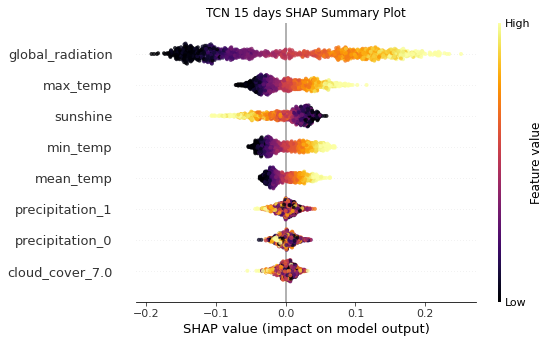

In [24]:
column_names = [
    "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]

shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8, 
                  alpha=0.8, show=False, title='None', cmap='inferno')

plt.title("TCN 15 days SHAP Summary Plot")
plt.show()


### energy consumption

#### 15 days TCN

In [22]:
import numpy as np

# 读取导出的CSV文件
shap_values_output = np.loadtxt("C:/Users/Administrator/Desktop/energy_TCN_15_shap_values_output.csv", delimiter=',')

print(shap_values_output.shape)

(1000, 23)


In [23]:
import torch

# 读取导出的PyTorch tensor文件
selected_samples = torch.load("C:/Users/Administrator/Desktop/energy_TCN_15_selected_samples.pt", map_location=torch.device('cpu'))

#print(loaded_data)
print(selected_samples.shape)

torch.Size([1000, 23])


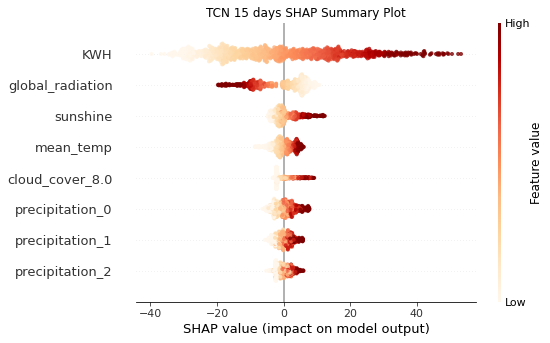

In [24]:
column_names = [
    "KWH", "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]

shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8, 
                  alpha=0.8, show=False, title='None', cmap='OrRd')

plt.title("TCN 15 days SHAP Summary Plot")
plt.show()


#### 3 days TCN

In [10]:
import numpy as np

# 读取导出的CSV文件
shap_values_output = np.loadtxt("C:/Users/Administrator/Desktop/energy_TCN_3_shap_values_output.csv", delimiter=',')

print(shap_values_output.shape)

(1000, 23)


In [11]:
import torch

# 读取导出的PyTorch tensor文件
selected_samples = torch.load("C:/Users/Administrator/Desktop/energy_TCN_3_selected_samples.pt", map_location=torch.device('cpu'))

#print(loaded_data)
print(selected_samples.shape)

torch.Size([1000, 23])


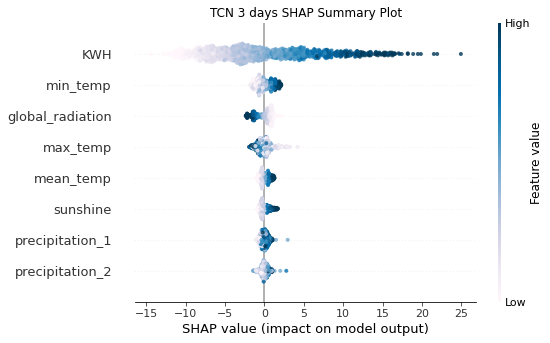

In [12]:
column_names = [
    "KWH", "sunshine", "global_radiation","max_temp","mean_temp","min_temp","pressure","cloud_cover_0.0","cloud_cover_1.0",
    "cloud_cover_2.0","cloud_cover_3.0","cloud_cover_4.0","cloud_cover_5.0","cloud_cover_6.0","cloud_cover_7.0",
    "cloud_cover_8.0","precipitation_0","precipitation_1","precipitation_2", "precipitation_3","precipitation_4",
    "snow_depth_0.0","snow_depth_1.0"
]

shap.summary_plot(shap_values_output, features=selected_samples, feature_names=column_names, max_display=8, 
                  alpha=0.8, show=False, title='None', cmap='PuBu')

plt.title("TCN 3 days SHAP Summary Plot")
plt.show()
